Khai báo các thư viện cần thiết

In [1]:
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Khai báo đường dẫn tới các tệp dữ liệu

In [3]:
data_path = 'D:/Code/python/mat3533/practice04/data/'

train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Xây dựng phương thức đọc dữ liệu từ tệp gzip, giải nén và đưa về định dạng là một dãy ảnh (một dãy ma trận
nguyên)

In [4]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không

In [5]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


Đưa tập dữ liệu đã đọc về 2 chiều, hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu

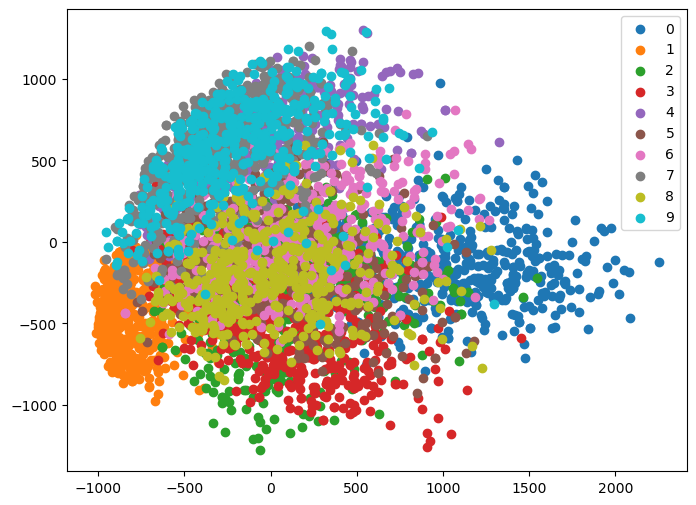

In [6]:
pca = PCA(n_components=2)
train_images_2d = pca.fit_transform(train_images)

# Plot data points with different classes
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(train_images_2d[train_labels == i, 0], train_images_2d[train_labels == i, 1], label=str(i))
plt.legend()
plt.show()

Chạy mô hình hồi quy Logistic nhiều lớp

In [7]:
model = LogisticRegression()
model.fit(train_images, train_labels)
predict_labels = model.predict(test_images)
print(predict_labels)

[0 1 9 ... 9 7 4]


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In ra độ chính xác 

In [8]:
accuracy_score(test_labels, predict_labels)

0.8752

In ra ma trận Confusion

In [9]:
confusion_matrix(test_labels, predict_labels)

array([[ 935,    0,    6,    5,    2,   29,    2,    6,    8,    5],
       [   0, 1090,    4,    2,    0,    7,    0,    6,   13,    5],
       [   8,    5,  850,   52,   14,    8,   31,   16,   48,    5],
       [   8,    0,   17,  888,    6,   41,    6,   17,   23,   20],
       [   4,    1,    9,    0,  863,    6,    7,    7,   17,   71],
       [  16,    1,   18,   38,   19,  705,   17,    4,   54,   21],
       [  11,    0,   33,    4,    7,   26,  883,    1,    8,    1],
       [   0,    5,   15,   18,   11,    0,    0,  906,   13,   43],
       [  17,   19,   10,   40,   11,   37,   10,    8,  781,   17],
       [   9,    1,    5,   21,   46,   12,    0,   37,   17,  851]],
      dtype=int64)